##Mask Detection

© 2024, Zaka AI, Inc. All Rights Reserved.

---
The goal of this project is to build a model that can detect whether a person is wearing a mask or not. You would be downloading the data from kaggle and then building you model while we guide you through the steps.


##Getting the Data

We start by getting the data. The data that we want is on kaggle and you can access it through this link: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset What you will have to do, is to search for a way that allows you to download the dataset from kaggle directly into google colab (or your google drive). This process would save you the trouble from downloading the dataset locally and then uploading it to use it in colab.

In [1]:
from google.colab import userdata
import os

os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

In [2]:
!kaggle datasets list -s 'face mask'

ref                                                              title                                                      size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
andrewmvd/face-mask-detection                                    Face Mask Detection                                   416968083  2020-05-22 07:18:42.220000          97724       1871  0.875            
vijaykumar1799/face-mask-detection                               Face Mask Detection                                   232816416  2021-05-19 15:24:14.857000           7979         87  0.875            
prasoonkottarathil/face-mask-lite-dataset                        Face Mask Lite Dataset                              25002249935  2020-07-12 05:14:16.797000          13166        173  0.875   

In [3]:
!kaggle datasets download -d 'omkargurav/face-mask-dataset'

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 95% 155M/163M [00:00<00:00, 1.61GB/s]
100% 163M/163M [00:00<00:00, 1.57GB/s]


Once the dataset is downloaded, it is going to be zipped, and in order to use it, you need to unzip it. Here you have the option of unzipping it in the environment or in your google drive.

In [4]:
!sudo apt-get install unzip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [5]:
!unzip face-mask-dataset.zip -d / &

Streaming output truncated to the last 5000 lines.
  inflating: /data/with_mask/with_mask_3297.jpg  
  inflating: /data/with_mask/with_mask_3298.jpg  
  inflating: /data/with_mask/with_mask_3299.jpg  
  inflating: /data/with_mask/with_mask_33.jpg  
  inflating: /data/with_mask/with_mask_330.jpg  
  inflating: /data/with_mask/with_mask_3300.jpg  
  inflating: /data/with_mask/with_mask_3301.jpg  
  inflating: /data/with_mask/with_mask_3302.jpg  
  inflating: /data/with_mask/with_mask_3303.jpg  
  inflating: /data/with_mask/with_mask_3304.jpg  
  inflating: /data/with_mask/with_mask_3305.jpg  
  inflating: /data/with_mask/with_mask_3306.jpg  
  inflating: /data/with_mask/with_mask_3307.jpg  
  inflating: /data/with_mask/with_mask_3308.jpg  
  inflating: /data/with_mask/with_mask_3309.jpg  
  inflating: /data/with_mask/with_mask_331.jpg  
  inflating: /data/with_mask/with_mask_3310.jpg  
  inflating: /data/with_mask/with_mask_3311.jpg  
  inflating: /data/with_mask/with_mask_3312.jpg  
  i

##Importing the Libraries

Now, it is time to import the libraries that we need.

In [ ]:
import shutil
import random
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import cv2

If we look at the data that we extracted, we can see that it is located in 2 folders: with_mask and without_mask. What we need to do now, is to create a hierarchy of folders that would help us specify the training, validation, and testing data. In order to do this you have to use the **os** and the **shutil** libraries that would help you creating folders, and moving images from a folder to another. In simple terms, the libraries helps you perform the same things that you do on your computer with your operating system, but in a programmatic way.

The initial dataset contains a lot of images belonging to the 2 classes, what we will do is randomly sample from this dataset so that we reduce the training and the tuning time.

We need to have in our final directories the following:
* Training: 500 images "with_mask", and 500 images "without_mask"
* Validation: 100 images "with_mask", and 100 images "without_mask"
* Testing: 50 images "with_mask", and 50 images "without_mask"

In [ ]:
src_with_mask = '/data/with_mask'
src_without_mask = '/data/without_mask'
base_dest = '/data/Mask_Detection'

In [ ]:
os.makedirs(os.path.join(base_dest, 'train', 'with_mask'), exist_ok=True)
os.makedirs(os.path.join(base_dest, 'train', 'without_mask'), exist_ok=True)
os.makedirs(os.path.join(base_dest, 'validation', 'with_mask'), exist_ok=True)
os.makedirs(os.path.join(base_dest, 'validation', 'without_mask'), exist_ok=True)
os.makedirs(os.path.join(base_dest, 'test', 'with_mask'), exist_ok=True)
os.makedirs(os.path.join(base_dest, 'test', 'without_mask'), exist_ok=True)

In [ ]:
def move_images(src_dir, dest_train, dest_val, dest_test, num_train, num_val, num_test):
    all_files = [f for f in os.listdir(src_dir) if os.path.isfile(os.path.join(src_dir, f))]

    random.shuffle(all_files)

    train_files = all_files[:num_train]
    val_files = all_files[num_train:num_train+num_val]
    test_files = all_files[num_train+num_val:num_train+num_val+num_test]

    for file in train_files:
        shutil.move(os.path.join(src_dir, file), dest_train)

    for file in val_files:
        shutil.move(os.path.join(src_dir, file), dest_val)

    for file in test_files:
        shutil.move(os.path.join(src_dir, file), dest_test)

move_images(
    src_with_mask,
    os.path.join(base_dest, 'train', 'with_mask'),
    os.path.join(base_dest, 'validation', 'with_mask'),
    os.path.join(base_dest, 'test', 'with_mask'),
    500, 100, 50
)

move_images(
    src_without_mask,
    os.path.join(base_dest, 'train', 'without_mask'),
    os.path.join(base_dest, 'validation', 'without_mask'),
    os.path.join(base_dest, 'test', 'without_mask'),
    500, 100, 50
)

print("Data splitting and moving completed successfully.")

Data splitting and moving completed successfully.


##Inspecting the Dataset

Now we will see some characteristics of our dataset.

Define 3 variables: **training_path**, **validation_path**, and **testing_path** so that you can use them for the rest of the colab.

In [ ]:
training_path = '/data/Mask_Detection/train'
validation_path = '/data/Mask_Detection/validation'
testing_path = '/data/Mask_Detection/test'

To make sure that everythinh went correctly, write a code that counts the number of images that you have in your training directory for each of the 2 categories: with_mask and without_mask

In [ ]:
subdirectories = ['with_mask', 'without_mask']
image_counts = {}

for subdir in subdirectories:
    subdir_path = os.path.join(training_path, subdir)
    image_count = 0

    for root, dirs, files in os.walk(subdir_path):
        for file in files:
            if file.lower().endswith('.jpg'):
                image_count += 1

    image_counts[subdir] = image_count

for subdir, count in image_counts.items():
    print(f"Number of images in '{subdir}': {count}")

Number of images in 'with_mask': 500
Number of images in 'without_mask': 500


Do the same for the validation and the testing folders

In [ ]:
image_counts = {}

for subdir in subdirectories:
    subdir_path = os.path.join(validation_path, subdir)
    image_count = 0

    for root, dirs, files in os.walk(subdir_path):
        for file in files:
            if file.lower().endswith('.jpg'):
                image_count += 1

    image_counts[subdir] = image_count

for subdir, count in image_counts.items():
    print(f"Number of images in '{subdir}': {count}")

Number of images in 'with_mask': 100
Number of images in 'without_mask': 100


In [ ]:
image_counts = {}

for subdir in subdirectories:
    subdir_path = os.path.join(testing_path, subdir)
    image_count = 0

    for root, dirs, files in os.walk(subdir_path):
        for file in files:
            if file.lower().endswith('.jpg'):
                image_count += 1

    image_counts[subdir] = image_count

for subdir, count in image_counts.items():
    print(f"Number of images in '{subdir}': {count}")

Number of images in 'with_mask': 50
Number of images in 'without_mask': 50


Write a code that shows 5 random images for people with mask from your training set.

In [ ]:
def visualize_samples(folder_path, n=5):
    images = os.listdir(folder_path)[:n]
    plt.figure(figsize=(10, 10))
    for i, img_name in enumerate(images):
        img_path = os.path.join(folder_path, img_name)
        img = plt.imread(img_path)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(img_name)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

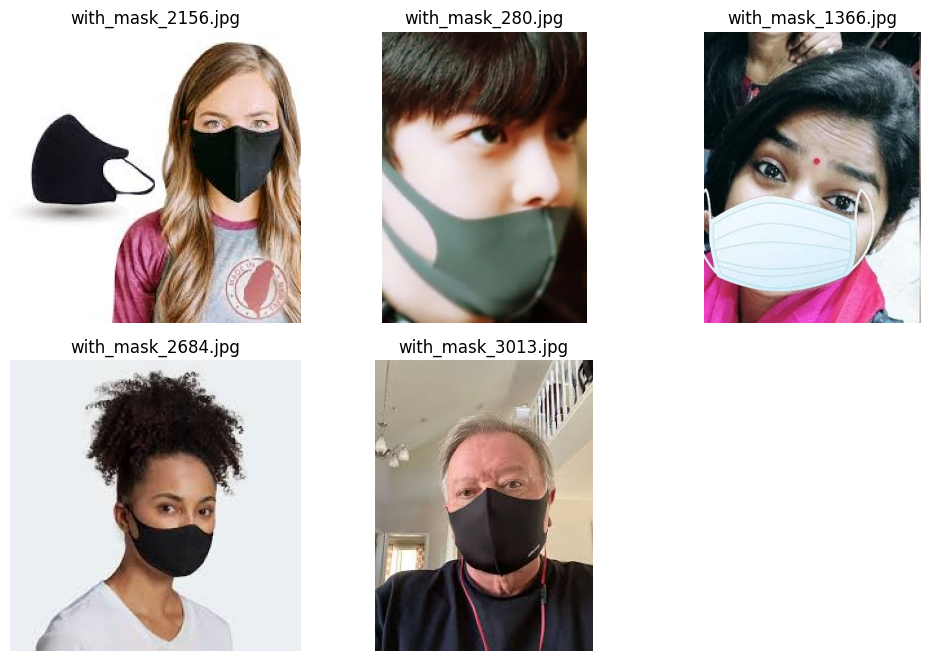

In [ ]:
visualize_samples(os.path.join(training_path, 'with_mask'))

Do the same for people without mask.

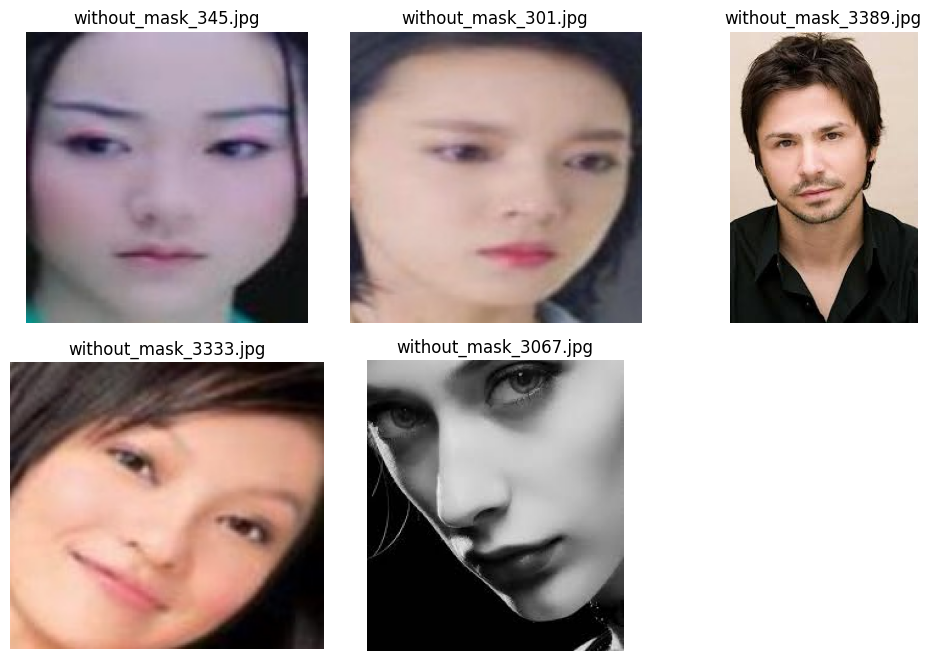

In [ ]:
visualize_samples(os.path.join(training_path, 'without_mask'))

##Modeling

Define a model structure that can deal with the images that we have to classify them between the 2 classes.

In [ ]:
Flatten, Dense, Dropout, Conv2D, MaxPooling2D, Input = tf.keras.layers.Flatten, tf.keras.layers.Dense, tf.keras.layers.Dropout, tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D, tf.keras.layers.Input

In [ ]:
model = tf.keras.models.Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'recall', 'precision'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Train the model that you defined on the training data and evaluate it on the validation data. Feel free to tune the hyperparameters of your model until you reach a satisfying result on the validation set. </br>
**N.B:** Make sure to save the model training history in a variable to plot later the learning curve.

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)
train_iterator = datagen.flow_from_directory(training_path, target_size=(150, 150), batch_size=32, class_mode='binary')
validation_iterator = datagen.flow_from_directory(validation_path, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
print(train_iterator.class_indices)

{'with_mask': 0, 'without_mask': 1}


In [ ]:
print('Batches train=%d, test=%d' % (len(train_iterator), len(validation_iterator)))
batchX, batchy = next(iter(train_iterator))
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batches train=32, test=7
Batch shape=(32, 150, 150, 3), min=0.000, max=1.000


In [ ]:
history = model.fit(
    train_iterator,
    steps_per_epoch=train_iterator.samples // train_iterator.batch_size,
    validation_data=validation_iterator,
    validation_steps=validation_iterator.samples // validation_iterator.batch_size,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.6223 - loss: 0.6839 - precision: 0.6534 - recall: 0.5154 - val_accuracy: 0.7865 - val_loss: 0.5156 - val_precision: 0.8462 - val_recall: 0.6947
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8125 - loss: 0.4133 - precision: 0.9286 - recall: 0.7222 - val_accuracy: 0.7500 - val_loss: 1.1826 - val_precision: 1.0000 - val_recall: 0.6000
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


31/31 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.8687 - loss: 0.3271 - precision: 0.8752 - recall: 0.8638 - val_accuracy: 0.8385 - val_loss: 0.4543 - val_precision: 0.8736 - val_recall: 0.7917
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8750 - loss: 0.3396 - precision: 0.8462 - recall: 0.8462 - val_accuracy: 0.7500 - val_loss: 0.5653 - val_precision: 0.7500 - val_recall: 0.7500
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.9021 - loss: 0.2582 - precision: 0.9211 - recall: 0.8732 - val_accuracy: 0.8021 - val_loss: 0.3818 - val_precision: 0.7900 - val_recall: 0.8229
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8750 - loss: 0.3770 - precision: 0.8571 - recall: 0.8571 - val_accuracy: 0.7500 - val_loss: 0.4089 - val_precision: 1.0000 - val_recall: 0.5000
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.9202 - loss: 0.2245 - precision: 0.9235 - recall: 0.9214 - val_accuracy: 0.8438 - val_loss: 0.3759 - val_precision:

Plot the accuracy curve and see if your model is overfit.

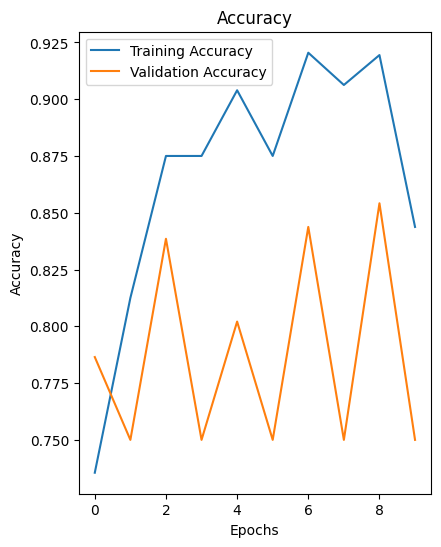

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label= 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label= 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

The validation accuracy is low while the training accuracy is high this is a clear sign of overfitting, the model needs to be further tuned and its generalization ability to be enhanced

##Evaluate the model


Now you will evaluate the model that you built on the testing set that you kept aside since the beginning.

In [ ]:
test_iterator = datagen.flow_from_directory(testing_path, target_size=(150, 150), batch_size=32, class_mode='binary', shuffle=False)

Found 100 images belonging to 2 classes.


In [ ]:
test_loss, test_accuracy, test_recall, test_precision = model.evaluate(test_iterator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}, Test Recall: {test_recall}, Test Precision: {test_precision}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 509ms/step - accuracy: 0.9171 - loss: 0.2558 - precision: 0.7025 - recall: 0.7240
Test Loss: 0.2749408185482025, Test Accuracy: 0.9100000262260437, Test Recall: 0.8999999761581421, Test Precision: 0.918367326259613


Now we want to visualize the confusion matrix in order to see how much our classifier is good in predicting different classes.

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 314ms/step
[[46  4]
 [ 5 45]]


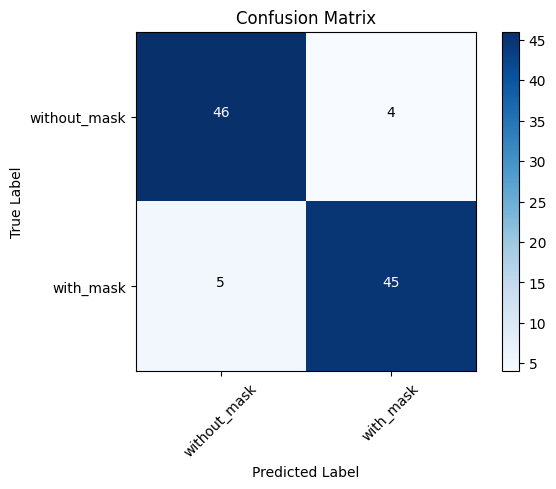

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

predictions = model.predict(test_iterator)
y_pred = np.round(predictions)
y_true = test_iterator.classes

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    print(cm)

    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, f"{cm[i, j]:.2f}" if normalize else str(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

cnf_matrix = confusion_matrix(y_true, y_pred)
class_names = ['without_mask', 'with_mask']

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()

**What did you learn about your model from this confusion matrix?**

The model performs fairly well and we can see that it has more trouble predicting the people with mask. We can see that there is no to little class imbalance from the values inside the confusion matrix. The model can be tuned further to perform better

##Error Analysis

Now we need to see for each of the images that we have in our testing set, what did the model predict. This helps us analyze the errors and try to think why the model predicted some things in the wrong way.

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 568ms/step


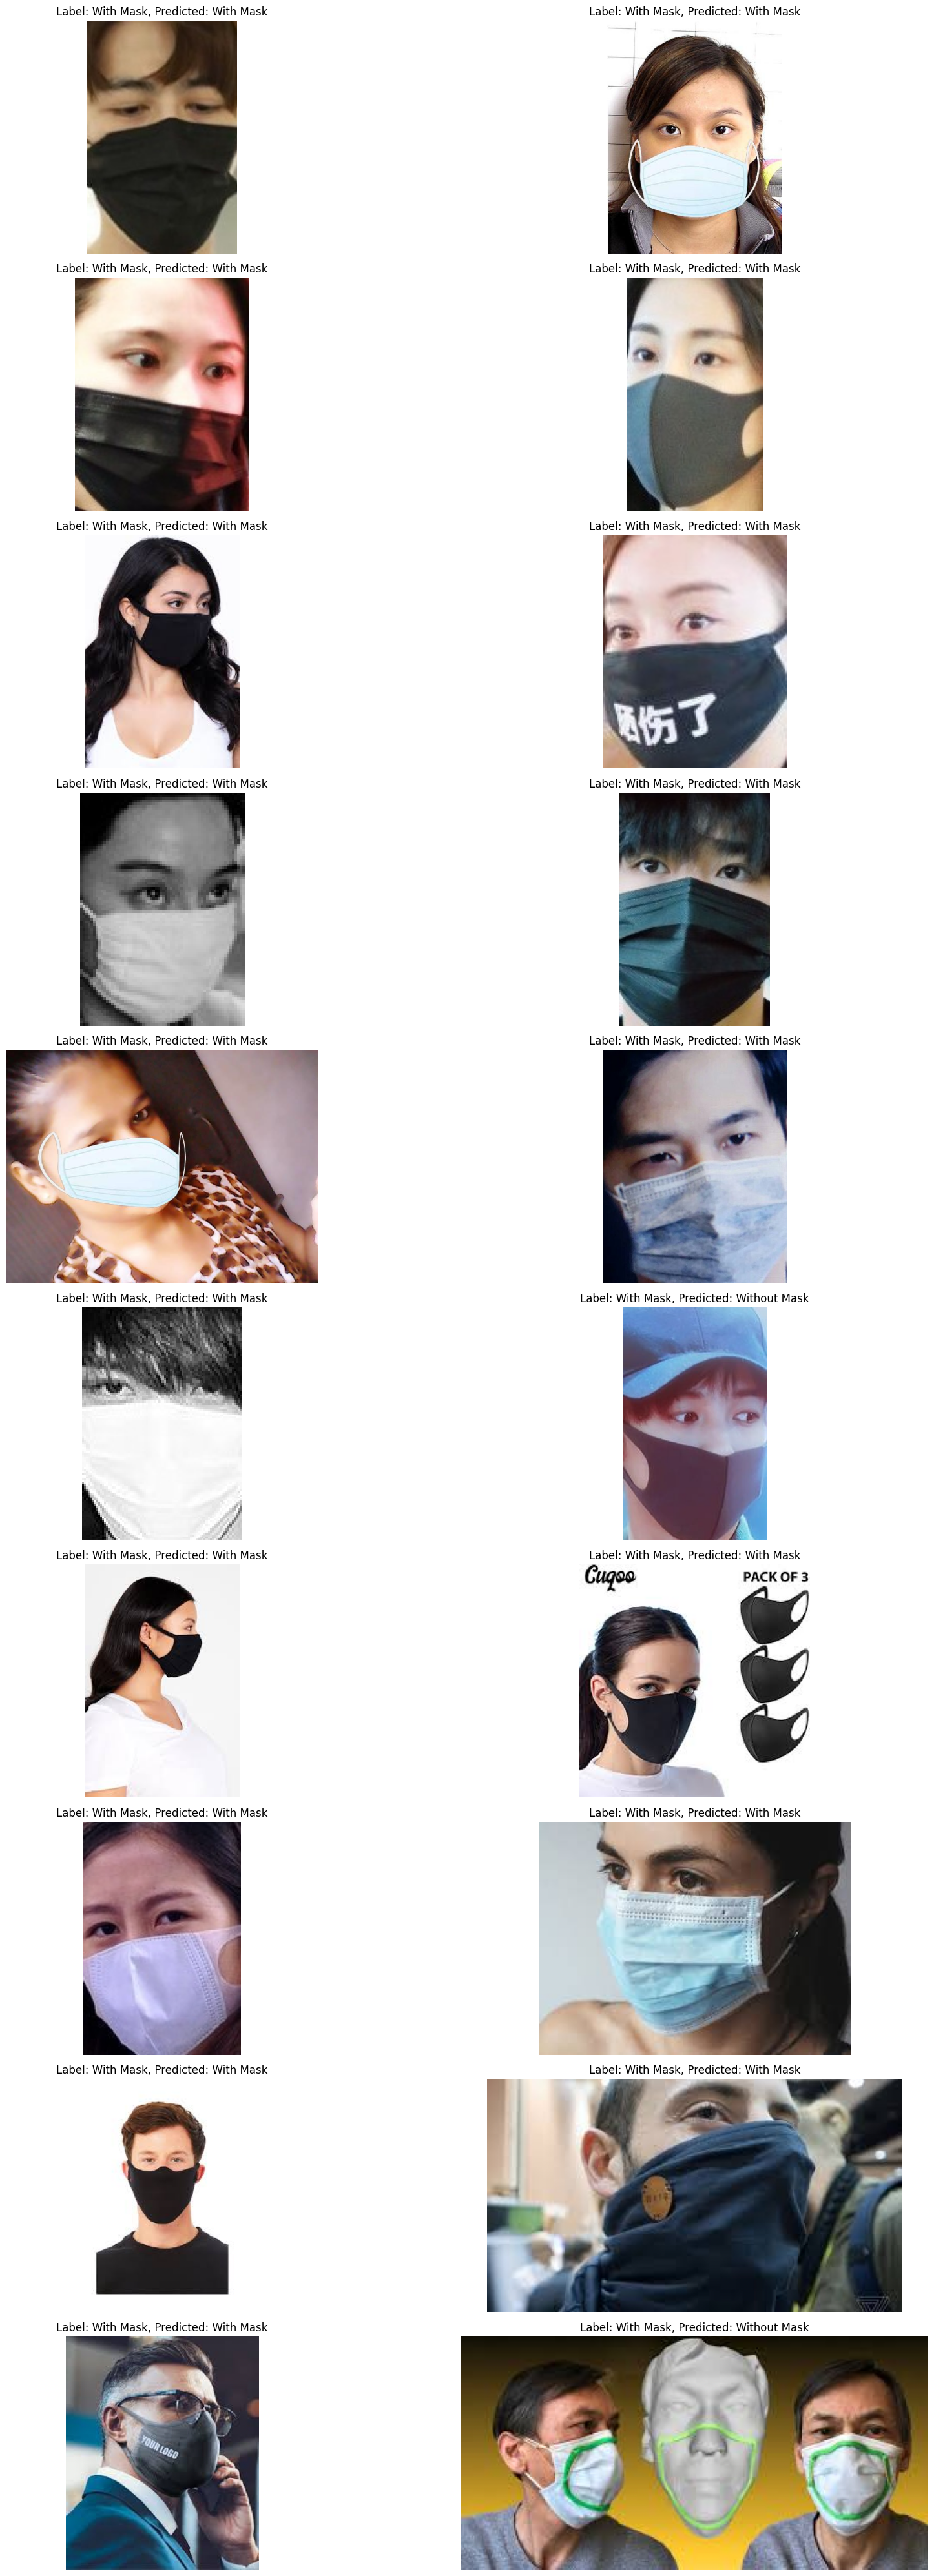

In [ ]:
test_iterator.reset()
predictions = model.predict(test_iterator)
y_pred = np.round(predictions)
y_true = test_iterator.classes
filenames = test_iterator.filenames
num_images = 20

plt.figure(figsize=(20, 40))
for i in range(min(num_images, len(filenames))):
    img_path = os.path.join(testing_path, filenames[i])
    img = plt.imread(img_path)
    plt.subplot(10, 2, i + 1)
    plt.imshow(img)
    true_label = "With Mask" if y_true[i] == 0 else "Without Mask"
    predicted_label = "With Mask" if y_pred[i] == 0 else "Without Mask"
    plt.title(f"Label: {true_label}, Predicted: {predicted_label}")
    plt.axis("off")
plt.tight_layout()
plt.show()

**Try to derive some conclusions from the wrong predictions that your model has made. Meaning: why do you think these predictions were wrong?**

We can see that the images that have multiple faces despite all faces theoretically wearing masks to be predicted wrongly and one image that is closed up and ears cut to be predicted wrongly meaning in the first scenario respectively, that the model failed to classify each face and there was green line which was like an occlusion. In the second scenario the image was cut and closed up while the other images were in a good distance, the model would be overfit and not predict correctly

**Think of a way that you can use in order to improve the performance of your model, and implement it**

We can apply Data Augmentation and change the model structure as well

**Your Friend took your code and ran it again, but obtained different accuracies on the different sets. How do you interpret this?**

The weight set at start are random so there will always be variance. I even ran it next day and got other accuracies and different accuracy graphs. Also it can get different accuracies on the datasets since its ability to generalize isn't that good right now and is overfitting

In [ ]:
model = tf.keras.models.Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'recall', 'precision'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 72, 72, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       2,654,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,674,593 (10.20 MB)

 Trainable params: 2,674,593 (10.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
train_iterator = datagen.flow_from_directory(training_path, target_size=(150, 150), batch_size=32, class_mode='binary')

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

validation_iterator = validation_datagen.flow_from_directory(
    validation_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
print(train_iterator.class_indices)

{'with_mask': 0, 'without_mask': 1}


In [ ]:
print('Batches train=%d, test=%d' % (len(train_iterator), len(validation_iterator)))
batchX, batchy = next(iter(train_iterator))
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batches train=32, test=7
Batch shape=(32, 150, 150, 3), min=0.000, max=1.000


In [ ]:
history = model.fit(
    train_iterator,
    steps_per_epoch=train_iterator.samples // train_iterator.batch_size,
    validation_data=validation_iterator,
    validation_steps=validation_iterator.samples // validation_iterator.batch_size,
    epochs=10
)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.5145 - loss: 0.9014 - precision: 0.5356 - recall: 0.3014 - val_accuracy: 0.7031 - val_loss: 0.5722 - val_precision: 0.9318 - val_recall: 0.4316
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6250 - loss: 0.6304 - precision: 1.0000 - recall: 0.2500 - val_accuracy: 0.8750 - val_loss: 0.5623 - val_precision: 1.0000 - val_recall: 0.8000
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.7686 - loss: 0.5564 - precision: 0.8417 - recall: 0.6830 - val_accuracy: 0.8229 - val_loss: 0.4838 - val_precision: 0.8947 - val_recall: 0.7234
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - accuracy: 0.6562 - loss: 0.6568 - precision: 0.7857 - recall: 0.5789 - val_accuracy: 0.7500 - val_loss: 0.4549 - val_precision: 1.0000 - val_recall: 0.6667
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.8019 - loss: 0.5240 - precision: 0.8154 - recall: 0.7757 - val_accuracy: 0.7656 - val_loss: 0.5131 - v

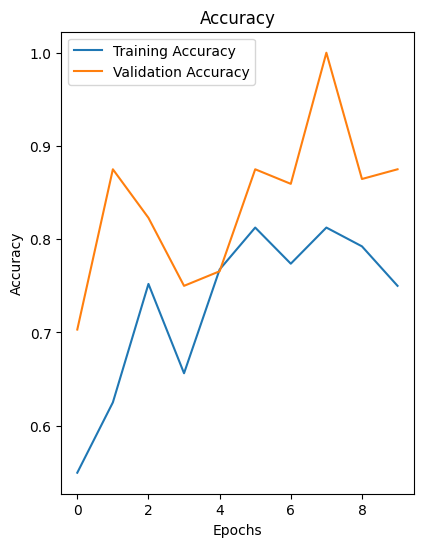

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label= 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label= 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

In [ ]:
test_iterator = datagen.flow_from_directory(testing_path, target_size=(150, 150), batch_size=32, class_mode='binary', shuffle=False)

Found 100 images belonging to 2 classes.


In [ ]:
test_loss, test_accuracy, test_recall, test_precision = model.evaluate(test_iterator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}, Test Recall: {test_recall}, Test Precision: {test_precision}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 350ms/step - accuracy: 0.8773 - loss: 0.3801 - precision: 0.6936 - recall: 0.6480
Test Loss: 0.41216057538986206, Test Accuracy: 0.8600000143051147, Test Recall: 0.800000011920929, Test Precision: 0.9090909361839294


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 581ms/step


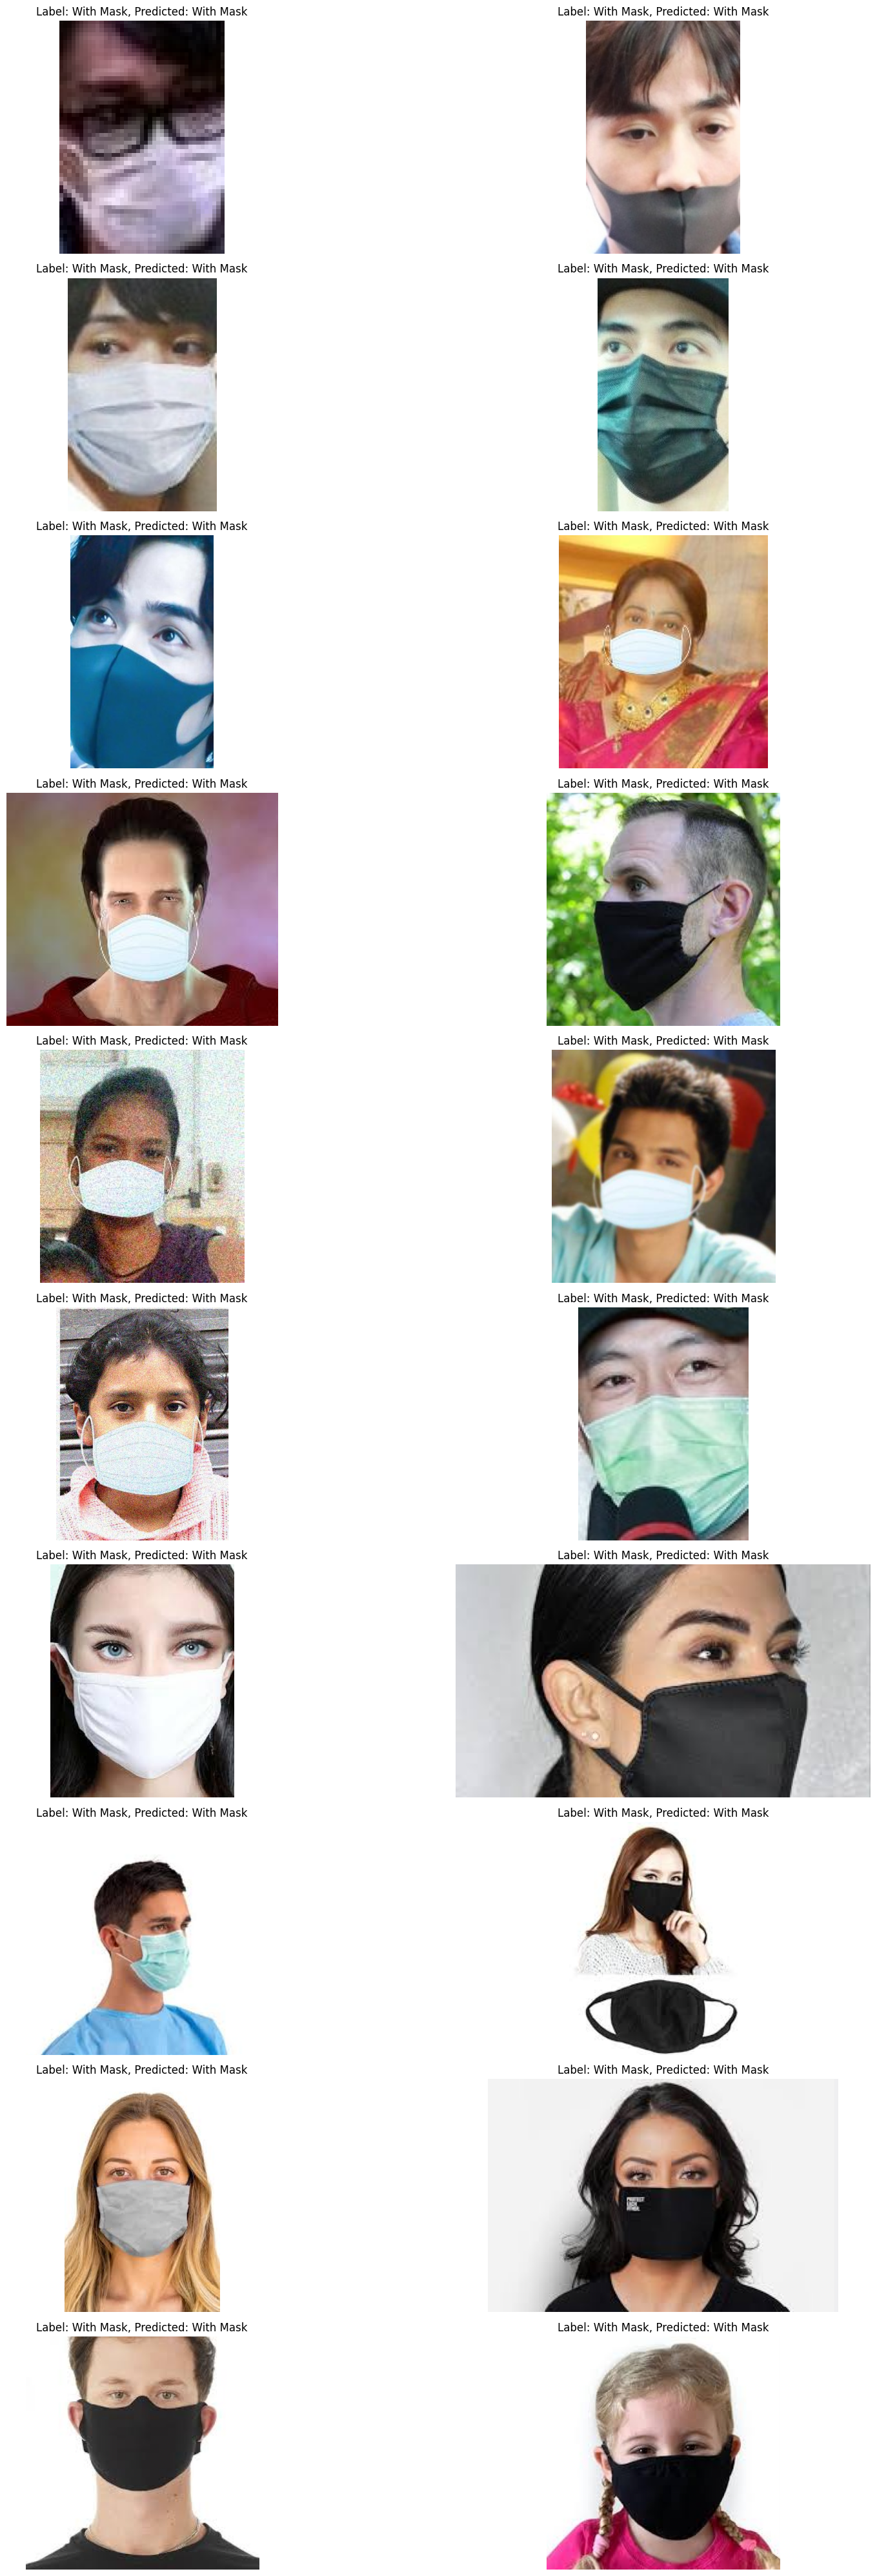

In [ ]:
test_iterator.reset()
predictions = model.predict(test_iterator)
y_pred = np.round(predictions)
y_true = test_iterator.classes
filenames = test_iterator.filenames
num_images = 20

plt.figure(figsize=(20, 40))
for i in range(min(num_images, len(filenames))):
    img_path = os.path.join(testing_path, filenames[i])
    img = plt.imread(img_path)
    plt.subplot(10, 2, i + 1)
    plt.imshow(img)
    true_label = "With Mask" if y_true[i] == 0 else "Without Mask"
    predicted_label = "With Mask" if y_pred[i] == 0 else "Without Mask"
    plt.title(f"Label: {true_label}, Predicted: {predicted_label}")
    plt.axis("off")
plt.tight_layout()
plt.show()

After changing the Model's structure and applying Image augmentation techniques we can see that the model's ability to generalize has improved and what previously was wrongly predicted is correctly predicted now.